# Preparacion de los datos

En esta seccion realizaremos la lectura del Excel, asi como su limpieza y de la creacion del dataframe con el que trabajaremos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import src.functions as f


Definiremos una funcion para la **lectura** 

In [2]:
f.leer


<function src.functions.leer(path, limit=250)>

Y una para **limpieza**

In [3]:
f.limpiar


<function src.functions.limpiar(path, limite=250)>

Finalmente guardamos el Dataframe

In [4]:
df = f.limpiar('../data/raw/QS WUR 2011-2022.xlsx', 400)


Lectura exitosa, tiempo total: 27.01 segundos


In [5]:
df.shape


(4360, 17)

In [6]:
df.isna().sum()


Year                      0
Rank                      0
O_Rank                    0
Institution               0
Academic Reputation       0
AR Rank                   0
Employer Reputation       0
ER Rank                   0
Faculty Student           0
FS Rank                   0
Citations per Faculty     0
CF Rank                   0
International Faculty     0
IF Rank                   0
International Students    0
IS Rank                   0
Overall Score             0
dtype: int64

# Modelacion

En esta etapa analizaremos los datos, principalmente 3 analisis

* Regresion lineal multiple, para predecir la importancia de cada Categoria en el *Overall Score*
* Regresion lineal simple, con el Tec para predecir su posicion en los rankings el proximo año
* Importancia de cada **Rank** 

## Regresion lineal multiple

Empezaremos escogiendo las columnas mas importantes, despues separemos los datos en entrenamiento y prueba, para finalmente conseguir el modelo

In [7]:
df.columns
ranks = ['Rank', 'O_Rank', 'AR Rank', 'ER Rank',
         'FS Rank', 'CF Rank',
         'IF Rank', 'IS Rank']


Para visualizar la correlacion de cada variable usaremos un **heatmap**

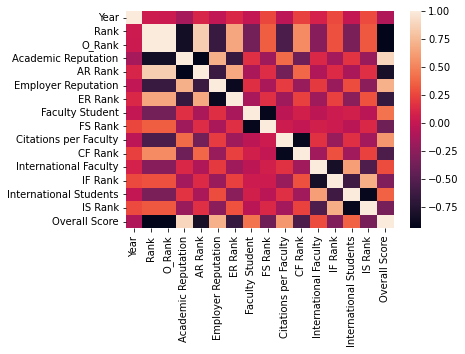

In [8]:
sns.heatmap(data=df.corr())
plt.show()


In [9]:
columnas = ['Academic Reputation', 'Employer Reputation', 'Faculty Student',
            'Citations per Faculty', 'International Faculty', 'International Students']


In [10]:
X = df[columnas].values

Y = df['Overall Score'].values


Para evitar _overfitting_ separamos los datos en 80% para entrenamiento y 20% para test

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)


Aplicamos el modelo de regresion lineal con los datos de entrenamiento

In [12]:
modelo = LinearRegression()


In [13]:
modelo.fit(X_train, Y_train)


LinearRegression()

In [14]:
coeff = pd.DataFrame(modelo.coef_, columnas, columns=['Coeffs'])


In [15]:
coeff


,Coeffs
Academic Reputation,0.408354
Employer Reputation,0.095134
Faculty Student,0.200147
Citations per Faculty,0.201084
International Faculty,0.036938
International Students,0.060432


La variable *Y_pred* sera la y que el modelo predecira usando los datos de test o sea el 20%

In [16]:
Y_pred = modelo.predict(X_test)


Para la validacion se calculara la diferencia entre la _y_ de prueba y la _y_ predecida

In [17]:
validacion = pd.DataFrame(
    {"Actual": Y_test, "Prediccion": Y_pred, "Diferencia": Y_test-Y_pred})


Tomamos una muestra de la validacion para hacer nuestros plot

In [18]:
validacion
muestra = validacion.sample(30)


Adicionalmente calculamos el $R^2$

In [19]:
r2_train = modelo.score(X_train, Y_train)
r2_test = modelo.score(X_test, Y_test)
print(f"R2 del entrenamiento: {r2_train:.4f}\nR2 del test: {r2_test:.4f}")


R2 del entrenamiento: 0.9971
R2 del test: 0.9964


Finalmente hacemos este plot, el cual nos muestra una buena precision del modelo

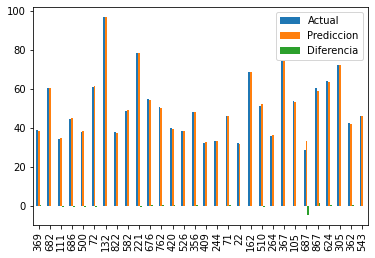

In [20]:
muestra.plot.bar()
plt.show()


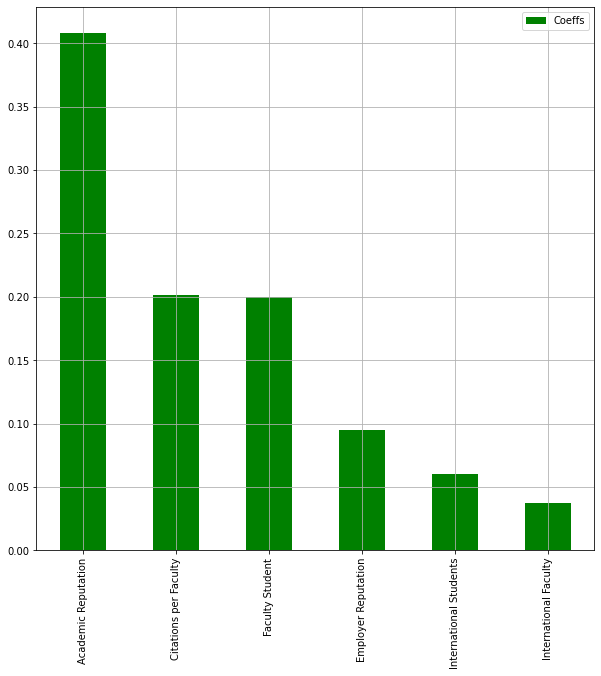

In [21]:
coeffs = abs(coeff.sort_values(by='Coeffs', ascending=False))
coeffs.plot.bar(figsize=(10, 10), color='green')
plt.grid()
plt.show()


### Puntos destacables

1. Las citas por escuela son mas importantesque la reputacion del empleador, el Tec suele ser reconocida por empleadores pero no es un rubro tan importante al parecer
2. La reputacion academica es casi la mitad del score
3. La parte internacional no parece ser tan importante

## Prediccion 2022 del tec

In [22]:
df_tec = df[df['Institution '] == 'Tecnológico de Monterrey (ITESM)']


In [23]:
df_tec.shape


(5, 17)

In [24]:
nuevo = [2022, np.nan, np.nan, 'Tecnológico de Monterrey (ITESM)', np.nan, np.nan,
         np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0]
nuevo = pd.Series(nuevo, index=df_tec.columns)


In [25]:
df_tec = df_tec.append(nuevo, ignore_index=True)


/var/folders/d_/jdkfxb9j7s5d540rn875nn2h0000gn/T/ipykernel_11067/696195750.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tec = df_tec.append(nuevo, ignore_index=True)


In [26]:
df_tec = df_tec.interpolate()


In [27]:
df_tec


,Year,Rank,O_Rank,Institution,Academic Reputation,AR Rank,Employer Reputation,ER Rank,Faculty Student,FS Rank,Citations per Faculty,CF Rank,International Faculty,IF Rank,International Students,IS Rank,Overall Score
0,2011.0,387.0,387.0,Tecnológico de Monterrey (ITESM),24.0,418.0,70.0,65.0,45.0,263.0,2.0,301.0,28.0,281.0,16.0,450.0,29.7
1,2012.0,320.0,320.0,Tecnológico de Monterrey (ITESM),36.3,308.0,59.4,51.0,52.6,233.0,2.4,301.0,37.4,266.0,28.5,371.0,35.4
2,2019.0,178.0,178.0,Tecnológico de Monterrey (ITESM),33.2,246.0,82.3,67.0,88.4,94.0,3.9,601.0,99.6,60.0,22.2,494.0,46.2
3,2020.0,158.0,158.0,Tecnológico de Monterrey (ITESM),36.9,226.0,88.9,53.0,89.5,82.0,4.6,601.0,98.2,98.0,18.4,549.0,48.5
4,2021.0,155.0,155.0,Tecnológico de Monterrey (ITESM),41.7,198.0,88.3,56.0,87.3,102.0,5.2,601.0,96.7,122.0,16.1,600.0,49.9
5,2022.0,155.0,155.0,Tecnológico de Monterrey (ITESM),41.7,198.0,88.3,56.0,87.3,102.0,5.2,601.0,96.7,122.0,16.1,600.0,0.0


In [28]:
df_tec[columnas].loc[5]


Academic Reputation       41.7
Employer Reputation       88.3
Faculty Student           87.3
Citations per Faculty      5.2
International Faculty     96.7
International Students    16.1
Name: 5, dtype: float64

In [29]:
modelo.predict([df_tec[columnas].loc[5]])


array([48.67332662])

Siguiendo el modelo, al tec le esperaria un score de **48.7**

In [30]:
df_2021 = df[df['Year'] == 2021]


In [31]:
df_2021[df_2021['Overall Score'] < 50]


,Year,Rank,O_Rank,Institution,Academic Reputation,AR Rank,Employer Reputation,ER Rank,Faculty Student,FS Rank,Citations per Faculty,CF Rank,International Faculty,IF Rank,International Students,IS Rank,Overall Score
154,2021.0,155.0,155.0,Tecnológico de Monterrey (ITESM),41.7,198.0,88.3,56.0,87.3,102.0,5.2,601.0,96.7,122.0,16.1,600.0,49.9
155,2021.0,156.0,156.0,University of Pittsburgh,43.9,178.0,19.6,459.0,96.7,59.0,45.6,266.0,8.6,601.0,19.4,548.0,49.7
156,2021.0,157.0,157.0,Michigan State University,61.5,110.0,65.6,105.0,15.4,601.0,52.9,184.0,62.0,294.0,26.9,454.0,49.6
157,2021.0,158.0,158.0,Emory University,25.8,321.0,14.5,105.0,98.5,44.0,63.9,110.0,50.1,346.0,41.1,347.0,49.1
158,2021.0,159.0,159.0,Cardiff University,47.4,166.0,39.4,238.0,48.0,330.0,38.9,333.0,81.7,220.0,77.0,170.0,48.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2021.0,396.0,391.0,Huazhong University of Science and Technology,20.0,417.0,31.7,308.0,16.2,601.0,63.8,111.0,12.6,601.0,5.5,601.0,28.2
396,2021.0,396.0,391.0,University of the Philippines,34.1,247.0,40.8,230.0,48.4,328.0,2.4,601.0,1.4,601.0,1.4,601.0,28.2
397,2021.0,398.0,391.0,La Trobe University,20.0,414.0,22.4,414.0,7.8,601.0,32.6,411.0,96.4,125.0,96.8,69.0,28.1
398,2021.0,398.0,391.0,Université de Strasbourg,42.8,190.0,6.7,414.0,6.8,601.0,23.4,511.0,40.5,402.0,40.8,352.0,28.1


Si las condiciones siguen iguales, puede que el tec suba a la posicion **157**

## Importancia de cada rank

Nuevamente una regresion multiple para calcular la importancia de cada rank en el rank final

In [32]:
ranks = ['AR Rank', 'ER Rank',
         'FS Rank', 'CF Rank',
         'IF Rank', 'IS Rank']


In [33]:
X = df[ranks].values


In [34]:
Y = df['Overall Score'].values


Para evitar _overfitting_ separamos los datos en 80% para entrenamiento y 20% para test

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)


Aplicamos el modelo de regresion lineal con los datos de entrenamiento

In [36]:
modelo = LinearRegression()


In [37]:
modelo.fit(X_train, Y_train)


LinearRegression()

In [38]:
coeff = pd.DataFrame(modelo.coef_, ranks, columns=['Coeffs'])


In [39]:
coeff


,Coeffs
AR Rank,-0.079120
ER Rank,-0.019642
FS Rank,-0.033098
CF Rank,-0.031578
IF Rank,-0.008727
IS Rank,-0.009889


In [40]:
r2_train = modelo.score(X_train, Y_train)
r2_test = modelo.score(X_test, Y_test)
print(f"R2 del entrenamiento: {r2_train:.4f}\nR2 del test: {r2_test:.4f}")


R2 del entrenamiento: 0.8766
R2 del test: 0.8755


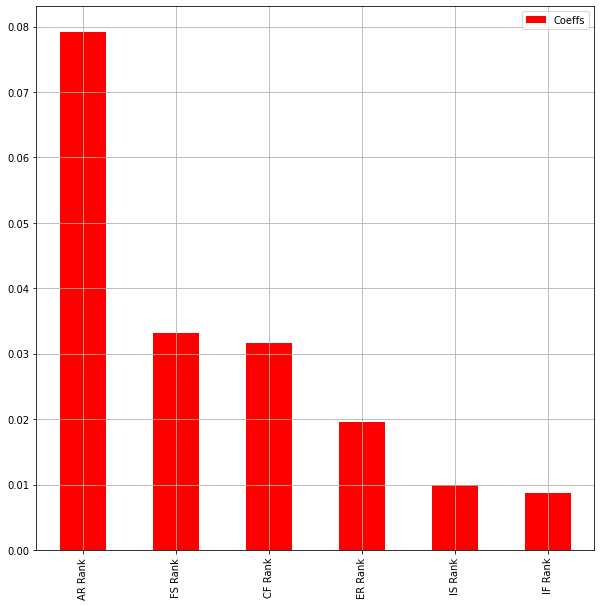

In [41]:
coeffs = abs(coeff.sort_values(by='Coeffs', ascending=True))
coeffs.plot.bar(figsize=(10, 10), color='red')
plt.grid()
plt.show()


### Puntos destacables

1. Usando esta metrica, el rubro Faculty Student es mas importante que el Citations per Faculty